### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 2. Centrality Measures

# Lecture 10: Closeness and Betweenness  Centrality

We study two more centrality measures
* closeness centrality and
* betweenness centrality

and compare these to the centralities studied earlier in the
example of the marital ties graph of the Florentine families.

Import the packages and set standard drawing options:

In [1]:
import networkx as nx
import pandas as pd
from queue import Queue
opts = { "with_labels": True, "node_color": 'y'}

Next, recover the graph `G` of marital ties between Florentine families, together with the node attributes we have already determined.

In [2]:
G = nx.read_yaml("data/florentine.yml")
G.nodes['Medici']

/Users/faddlebadiane/anaconda3/lib/python3.7/site-packages/networkx/readwrite/nx_yaml.py:99: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  G = yaml.load(path)


{'$C_i^D$': 0.4,
 '$c_i^E$': 0.4303154258349922,
 'degree': 6,
 'priorates': 53,
 'wealth': 103}

In [3]:
G.number_of_nodes()

16

## Closeness Centrality

A node $x$ in a network can be regarded as being central, if it is **close** to (many) other nodes, 
as it can then quickly interact with them.  A simple way to measure closeness in this sense
is based on the sum of all the distances to the other nodes, as follows.

<div class="alert alert-danger">

**Definition (Closeness Centrality).**
In a simple, connected graph $G$, the **closeness centrality** $c_i^C$ of node $i$
is defined as
$$
c_i^C = \Bigl(\sum_j d_{ij}\Bigr)^{-1}.
$$

The **normalized closeness centrality** of node $i$, defined as
$$
C_i^C = (n-1) c_i^C
$$
takes values in the interval $[0, 1]$.
</div>

**BFS again.**  

* The following `python` function implements
BFS for shortest distance from a previous lecture.  
* It takes a graph $G = (X, E)$ and a vertex $x \in X$
as its arguments. 
* It returns a **dictionary**, which for each node as key has the distance to
$x$ as its value.

In [4]:
def distances(G, node):
    
    # 1. init: set up the dictionary and a queue
    d = { node: 0 }
    q = Queue()
    q.put(node)
    
    # 2. loop
    while not q.empty():
        x = q.get()
        for y in G.neighbors(x):
            if y not in d:
                d[y] = d[x] + 1
                q.put(y)
    
    # 3. stop here
    return d

In [5]:
d = distances(G, 'Medici')
print(d)

{'Medici': 0, 'Acciaiuoli': 1, 'Albizzi': 1, 'Barbadori': 1, 'Ridolfi': 1, 'Salviati': 1, 'Tornabuoni': 1, 'Ginori': 2, 'Guadagni': 2, 'Castellani': 2, 'Strozzi': 2, 'Pazzi': 2, 'Bischeri': 3, 'Lamberteschi': 3, 'Peruzzi': 3}


In [6]:
distances(G, 'Pucci')

{'Pucci': 0}

* If the sum of the distances is $0$ (why?), computing the closeness will most likely
cause a division-by-zero error.

* From now on, we will work only with the large connected component of `G`, and
call it `GG`.

In [7]:
cc = list(nx.connected_components(G))[0]
GG = G.subgraph(cc)
n = GG.number_of_nodes()

In [8]:
nx.draw(GG, **opts)

In [9]:
d = distances(GG, 'Medici')
sum(d.values())

25

* Use `distances` to compute the normalized closeness centrality according to the above
definition.

In [10]:
close_cen = { x : (n-1)/sum(distances(GG, x).values()) for x in GG }
close_cen

{'Acciaiuoli': 0.3684210526315789,
 'Albizzi': 0.4827586206896552,
 'Barbadori': 0.4375,
 'Bischeri': 0.4,
 'Castellani': 0.3888888888888889,
 'Ginori': 0.3333333333333333,
 'Guadagni': 0.4666666666666667,
 'Lamberteschi': 0.32558139534883723,
 'Medici': 0.56,
 'Pazzi': 0.2857142857142857,
 'Peruzzi': 0.3684210526315789,
 'Ridolfi': 0.5,
 'Salviati': 0.3888888888888889,
 'Strozzi': 0.4375,
 'Tornabuoni': 0.4827586206896552}

* Compare the results to the `networkx` version of closeness:

In [11]:
nx.closeness_centrality(GG)

{'Acciaiuoli': 0.3684210526315789,
 'Albizzi': 0.4827586206896552,
 'Barbadori': 0.4375,
 'Bischeri': 0.4,
 'Castellani': 0.3888888888888889,
 'Ginori': 0.3333333333333333,
 'Guadagni': 0.4666666666666667,
 'Lamberteschi': 0.32558139534883723,
 'Medici': 0.56,
 'Pazzi': 0.2857142857142857,
 'Peruzzi': 0.3684210526315789,
 'Ridolfi': 0.5,
 'Salviati': 0.3888888888888889,
 'Strozzi': 0.4375,
 'Tornabuoni': 0.4827586206896552}

* Let's add those measurements to the table.

In [12]:
nx.set_node_attributes(G, close_cen, '$C_i^C$')

In [13]:
pd.DataFrame.from_dict(
    dict(G.nodes(data=True)), 
    orient='index'
).sort_values('degree', ascending=False)

,$C_i^D$,$c_i^E$,degree,priorates,wealth,$C_i^C$
Medici,0.400000,4.303154e-01,6,53,103,0.560000
Guadagni,0.266667,2.891172e-01,4,21,8,0.466667
Strozzi,0.266667,3.559730e-01,4,74,146,0.437500
Albizzi,0.200000,2.439605e-01,3,65,36,0.482759
Bischeri,0.200000,2.827944e-01,3,12,44,0.400000
Castellani,0.200000,2.590200e-01,3,22,20,0.388889
Peruzzi,0.200000,2.757224e-01,3,42,49,0.368421
Ridolfi,0.200000,3.415544e-01,3,38,27,0.500000
Tornabuoni,0.200000,3.258467e-01,3,n/a,48,0.482759
Barbadori,0.133333,2.117057e-01,2,n/a,55,0.437500


## Betweenness Centrality

When interactions between non-adjacent agents in a network depend
on middle men (on shortest paths between these agents), power comes
to those in the middle.  Betweenness centrality measures centrality
in terms of the number of shortest paths a node lies on.

<div class="alert alert-warning">
    
**Defintion (Betweenness Centrality).**
In a simple, connected graph $G$, the **betweenness centrality** $c_i^B$ of node $i$
is defined as
$$
c_i^B = \sum_{j \neq i} \sum_{k \neq i} \frac{n_{jk}(i)}{n_{jk}},
$$
where $n_{jk}$ denotes the **number** of shortest paths from
node $j$ to node $k$, and where $n_{jk}(i)$ denotes the
number of those shortest paths **passing through** node $i$.

The **normalized betweenness centrality** of node $i$, defined as
$$
C_i^B = \frac{c_i^B}{(n-1)(n-2)}
$$
takes values in the interval $[0, 1]$.
</div>

**BFS once more.**  This time as a python function, which returns a **dictionary** that contains, for each node $y$, a list of **immediate predecessors** of $y$
in a shortest path from $x$ to $y$.  Yes, that's another piece of information that BFS can determine
on the fly.  From this, recursively, one can reconstruct **all shortest paths** from $x$ to $y$.
We still need to compute the shortest path lengths in order to decide which neighbor $x$
actually is a predecessor of $y$: .

In [14]:
def predecessors(G, node):
    
    # 1. init: set up the two dictionaries and queue
    dists = { node: 0 }
    preds = { x : [] for x in G }
    q = Queue()
    q.put(node)
    
    # 2. loop
    while not q.empty():
        x = q.get()
        for y in G.neighbors(x):
            if y not in dists:
                dists[y] = dists[x] + 1
                q.put(y)
            if dists[y] == dists[x] + 1:
                preds[y].append(x)
    
    # 3. stop here
    return preds

In [15]:
p = predecessors(GG, 'Medici')
p

{'Acciaiuoli': ['Medici'],
 'Albizzi': ['Medici'],
 'Barbadori': ['Medici'],
 'Bischeri': ['Guadagni', 'Strozzi'],
 'Castellani': ['Barbadori'],
 'Ginori': ['Albizzi'],
 'Guadagni': ['Albizzi', 'Tornabuoni'],
 'Lamberteschi': ['Guadagni'],
 'Medici': [],
 'Pazzi': ['Salviati'],
 'Peruzzi': ['Castellani', 'Strozzi'],
 'Ridolfi': ['Medici'],
 'Salviati': ['Medici'],
 'Strozzi': ['Ridolfi'],
 'Tornabuoni': ['Medici']}

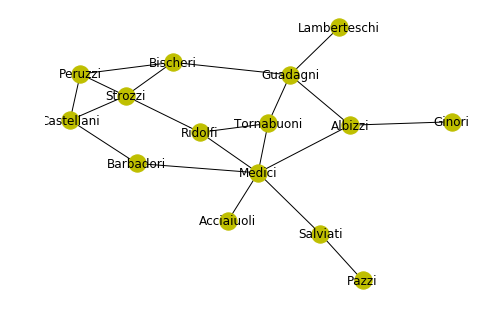

In [16]:
nx.draw(GG, **opts)

Using the predecessor lists with respect to $x$, the shortest paths from $x$ to $y$ can be enumerated recursively:
the shortest path from $x$ to itself is the empty path starting an ending at $x$.
Else, if $y \neq x$ then each shortest path from $x$ to $y$ travels through
exactly one of $y$'s predecessors ... and ends in $y$.

In [17]:
def shortest_paths(x, y, pre):
    if x == y:
        return [[x]]
    paths = []
    for p in pre[y]:
        for path in shortest_paths(x, p, pre):
            paths.append(path + [y])
    return paths

In [18]:
shortest_paths('Medici', 'Bischeri', p)

[['Medici', 'Albizzi', 'Guadagni', 'Bischeri'],
 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri'],
 ['Medici', 'Ridolfi', 'Strozzi', 'Bischeri']]

* Now compute betweenness:

In [19]:
between = { x : 0.0 for x in GG }

In [20]:
for x in GG:
    pre = predecessors(GG, x)
    for y in GG:
        paths = shortest_paths(x, y, pre)
        njk = len(paths)*(n-1)*(n-2)
        for p in paths:
            for z in p[1:-1]:  # exclude endpoints
                between[z] += 1/njk

In [21]:
between

{'Acciaiuoli': 0.0,
 'Albizzi': 0.2124542124542123,
 'Barbadori': 0.09340659340659344,
 'Bischeri': 0.10439560439560439,
 'Castellani': 0.05494505494505494,
 'Ginori': 0.0,
 'Guadagni': 0.25457875457875445,
 'Lamberteschi': 0.0,
 'Medici': 0.521978021978021,
 'Pazzi': 0.0,
 'Peruzzi': 0.02197802197802198,
 'Ridolfi': 0.11355311355311352,
 'Salviati': 0.14285714285714285,
 'Strozzi': 0.10256410256410255,
 'Tornabuoni': 0.09157509157509156}

In [22]:
nx.betweenness_centrality(GG)

{'Acciaiuoli': 0.0,
 'Albizzi': 0.21245421245421245,
 'Barbadori': 0.09340659340659341,
 'Bischeri': 0.1043956043956044,
 'Castellani': 0.05494505494505495,
 'Ginori': 0.0,
 'Guadagni': 0.25457875457875456,
 'Lamberteschi': 0.0,
 'Medici': 0.521978021978022,
 'Pazzi': 0.0,
 'Peruzzi': 0.02197802197802198,
 'Ridolfi': 0.11355311355311355,
 'Salviati': 0.14285714285714288,
 'Strozzi': 0.10256410256410257,
 'Tornabuoni': 0.09157509157509158}

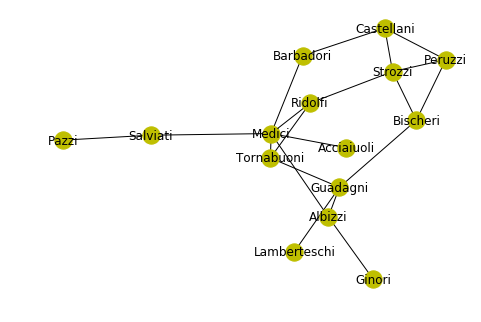

In [23]:
nx.draw(GG, **opts)

* Finally, let's add the normalized betweenness centralities as attributes to the
nodes of the graph, and display the resulting table.

In [24]:
nx.set_node_attributes(G, between, '$C_i^B$')

In [25]:
pd.DataFrame.from_dict(
    dict(G.nodes(data=True)), 
    orient='index'
).sort_values('degree', ascending=False)

,$C_i^D$,$c_i^E$,degree,priorates,wealth,$C_i^C$,$C_i^B$
Medici,0.400000,4.303154e-01,6,53,103,0.560000,0.521978
Guadagni,0.266667,2.891172e-01,4,21,8,0.466667,0.254579
Strozzi,0.266667,3.559730e-01,4,74,146,0.437500,0.102564
Albizzi,0.200000,2.439605e-01,3,65,36,0.482759,0.212454
Bischeri,0.200000,2.827944e-01,3,12,44,0.400000,0.104396
Castellani,0.200000,2.590200e-01,3,22,20,0.388889,0.054945
Peruzzi,0.200000,2.757224e-01,3,42,49,0.368421,0.021978
Ridolfi,0.200000,3.415544e-01,3,38,27,0.500000,0.113553
Tornabuoni,0.200000,3.258467e-01,3,n/a,48,0.482759,0.091575
Barbadori,0.133333,2.117057e-01,2,n/a,55,0.437500,0.093407


##  Code Corner

### `networkx`

* `read_yaml`: [[doc]](https://networkx.github.io/documentation/stable/reference/readwrite/generated/networkx.readwrite.nx_yaml.read_yaml.html#networkx.readwrite.nx_yaml.read_yaml)


* `closeness_centrality`: [[doc]](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality)
   
    
* `betweenness_centrality`: [[doc]](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality)

## Exercises

1. Recall that $C_i^C$ is the normalized closeness centrality of node $i$.  Why
   is $0 \leq C_i^C \leq 1$?  When is $C_i^C = 1$?  Is $C_i^C$ ever $0$?

2. Recall that $C_i^B$ is the normalized betweenness centrality of node $i$.
   Why is $0 \leq C_i^B \leq 1$?  When is $C_i^B = 1$?  Is $C_i^B$ ever $0$?
   
3. Determine the closeness centrality and the betweenness centrality of the nodes in some
   random trees.  What do you observe?
   
3. Compute the closeness centrality and the betweenness centrality of the nodes of the Petersen graph.
   What do you observe?